# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

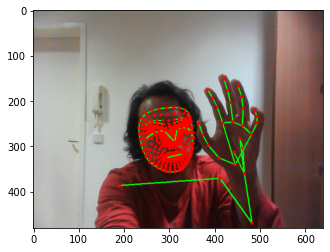

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.left_hand_landmarks.landmark)
#len(results.pose_landmarks.landmark)

21

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
 #   if results.face_landmarks 
  #  else np.zeros(1404)


In [12]:
lh

array([ 6.97161138e-01,  7.10022569e-01, -4.17915726e-05,  6.42129540e-01,
        6.77845418e-01, -3.19738612e-02,  6.03910565e-01,  6.20334864e-01,
       -5.19683473e-02,  5.85653424e-01,  5.71236014e-01, -7.39261582e-02,
        5.72339594e-01,  5.22571743e-01, -9.30134952e-02,  6.53347909e-01,
        5.16847670e-01, -4.03214619e-02,  6.34656012e-01,  4.45352256e-01,
       -7.72775039e-02,  6.18764877e-01,  4.04081047e-01, -1.06258303e-01,
        6.01648569e-01,  3.64774406e-01, -1.28611416e-01,  6.89619124e-01,
        5.12888551e-01, -5.37592508e-02,  6.80945218e-01,  4.24950898e-01,
       -8.78766328e-02,  6.70562208e-01,  3.68876308e-01, -1.24128655e-01,
        6.58488929e-01,  3.18505287e-01, -1.52246818e-01,  7.23009288e-01,
        5.32556176e-01, -7.07268491e-02,  7.24827528e-01,  4.50358868e-01,
       -1.06030032e-01,  7.18829155e-01,  3.97438824e-01, -1.43034041e-01,
        7.07179487e-01,  3.48708361e-01, -1.74438670e-01,  7.54658818e-01,
        5.70167065e-01, -

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.48853523,  0.6048764 , -1.2536056 , ...,  0.        ,
        0.        ,  0.        ])

In [16]:
#NO
np.save('0', result_test)

In [17]:
#NO
np.load('0.npy')

array([ 0.48853523,  0.6048764 , -1.2536056 , ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [18]:

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['GO', 'COME', 'STOP'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [19]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [20]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    start_folder=0
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [21]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'GO': 0, 'COME': 1, 'STOP': 2}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(90, 30, 1662)

In [27]:
np.array(labels).shape

(90,)

In [28]:
X = np.array(sequences)

In [29]:
X.shape

(90, 30, 1662)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [37]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

# in anaconda powershell     C:\Users\Dell\Pose Detection\Logs\train>tensorboard --logdir=.

Epoch 1/2000
3/3 [==============================] - 3s 278ms/step - loss: 14.2510 - categorical_accuracy: 0.3327
Epoch 2/2000
3/3 [==============================] - 0s 75ms/step - loss: 16.7119 - categorical_accuracy: 0.3992
Epoch 3/2000
3/3 [==============================] - 0s 73ms/step - loss: 20.0491 - categorical_accuracy: 0.2739
Epoch 4/2000
3/3 [==============================] - 0s 76ms/step - loss: 16.4555 - categorical_accuracy: 0.2055
Epoch 5/2000
3/3 [==============================] - 0s 77ms/step - loss: 20.4584 - categorical_accuracy: 0.4110
Epoch 6/2000
3/3 [==============================] - 0s 73ms/step - loss: 24.9079 - categorical_accuracy: 0.3581
Epoch 7/2000
3/3 [==============================] - 0s 75ms/step - loss: 21.0411 - categorical_accuracy: 0.4051
Epoch 8/2000
3/3 [==============================] - 0s 74ms/step - loss: 27.5724 - categorical_accuracy: 0.2603
Epoch 9/2000
3/3 [==============================] - 0s 75ms/step - loss: 31.3002 - categorical_accuracy

3/3 [==============================] - 0s 81ms/step - loss: 206.5537 - categorical_accuracy: 0.3679
Epoch 73/2000
3/3 [==============================] - 0s 79ms/step - loss: 371.2962 - categorical_accuracy: 0.2994
Epoch 74/2000
3/3 [==============================] - 0s 80ms/step - loss: 209.9637 - categorical_accuracy: 0.4598
Epoch 75/2000
3/3 [==============================] - 0s 80ms/step - loss: 469.3086 - categorical_accuracy: 0.3562
Epoch 76/2000
3/3 [==============================] - 0s 80ms/step - loss: 296.1548 - categorical_accuracy: 0.4325
Epoch 77/2000
3/3 [==============================] - 0s 81ms/step - loss: 492.7378 - categorical_accuracy: 0.3404
Epoch 78/2000
3/3 [==============================] - 0s 83ms/step - loss: 200.4687 - categorical_accuracy: 0.3073
Epoch 79/2000
3/3 [==============================] - 0s 75ms/step - loss: 158.7249 - categorical_accuracy: 0.3660
Epoch 80/2000
3/3 [==============================] - 0s 80ms/step - loss: 264.7936 - categorical_accur

3/3 [==============================] - 0s 73ms/step - loss: 30.9644 - categorical_accuracy: 0.4090
Epoch 144/2000
3/3 [==============================] - 0s 71ms/step - loss: 36.6560 - categorical_accuracy: 0.3464
Epoch 145/2000
3/3 [==============================] - 0s 71ms/step - loss: 22.2144 - categorical_accuracy: 0.3112
Epoch 146/2000
3/3 [==============================] - 0s 72ms/step - loss: 20.4940 - categorical_accuracy: 0.3915
Epoch 147/2000
3/3 [==============================] - 0s 71ms/step - loss: 18.2830 - categorical_accuracy: 0.3131
Epoch 148/2000
3/3 [==============================] - 0s 70ms/step - loss: 16.7579 - categorical_accuracy: 0.3620
Epoch 149/2000
3/3 [==============================] - 0s 70ms/step - loss: 17.7557 - categorical_accuracy: 0.4129
Epoch 150/2000
3/3 [==============================] - 0s 71ms/step - loss: 20.4897 - categorical_accuracy: 0.3425
Epoch 151/2000
3/3 [==============================] - 0s 70ms/step - loss: 24.9440 - categorical_accura

3/3 [==============================] - 0s 73ms/step - loss: 18.4941 - categorical_accuracy: 0.3738
Epoch 216/2000
3/3 [==============================] - 0s 71ms/step - loss: 15.2983 - categorical_accuracy: 0.3894
Epoch 217/2000
3/3 [==============================] - 0s 72ms/step - loss: 15.8844 - categorical_accuracy: 0.3092
Epoch 218/2000
3/3 [==============================] - 0s 70ms/step - loss: 22.0525 - categorical_accuracy: 0.4422
Epoch 219/2000
3/3 [==============================] - 0s 71ms/step - loss: 15.2654 - categorical_accuracy: 0.4285
Epoch 220/2000
3/3 [==============================] - 0s 71ms/step - loss: 20.0378 - categorical_accuracy: 0.3307
Epoch 221/2000
3/3 [==============================] - 0s 73ms/step - loss: 20.5355 - categorical_accuracy: 0.3816
Epoch 222/2000
3/3 [==============================] - 0s 70ms/step - loss: 23.6621 - categorical_accuracy: 0.3758
Epoch 223/2000
3/3 [==============================] - 0s 71ms/step - loss: 12.5269 - categorical_accura

3/3 [==============================] - 0s 71ms/step - loss: 4.9047 - categorical_accuracy: 0.4541
Epoch 288/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.4895 - categorical_accuracy: 0.5049
Epoch 289/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.4686 - categorical_accuracy: 0.4951
Epoch 290/2000
3/3 [==============================] - 0s 70ms/step - loss: 5.7186 - categorical_accuracy: 0.2721
Epoch 291/2000
3/3 [==============================] - 0s 72ms/step - loss: 3.2065 - categorical_accuracy: 0.5048
Epoch 292/2000
3/3 [==============================] - 0s 71ms/step - loss: 4.8462 - categorical_accuracy: 0.3366
Epoch 293/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.4780 - categorical_accuracy: 0.4716
Epoch 294/2000
3/3 [==============================] - 0s 71ms/step - loss: 3.6034 - categorical_accuracy: 0.4227
Epoch 295/2000
3/3 [==============================] - 0s 71ms/step - loss: 7.9979 - categorical_accuracy: 0.485

3/3 [==============================] - 0s 71ms/step - loss: 1.9795 - categorical_accuracy: 0.5323
Epoch 360/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.0827 - categorical_accuracy: 0.5303
Epoch 361/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.3617 - categorical_accuracy: 0.3405
Epoch 362/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.9999 - categorical_accuracy: 0.6066
Epoch 363/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.6955 - categorical_accuracy: 0.4658
Epoch 364/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.0906 - categorical_accuracy: 0.5421
Epoch 365/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.8086 - categorical_accuracy: 0.5852
Epoch 366/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.1880 - categorical_accuracy: 0.5478
Epoch 367/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.0508 - categorical_accuracy: 0.591

3/3 [==============================] - 0s 71ms/step - loss: 1.0639 - categorical_accuracy: 0.5832
Epoch 432/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.9684 - categorical_accuracy: 0.6770
Epoch 433/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.1356 - categorical_accuracy: 0.6537
Epoch 434/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.2074 - categorical_accuracy: 0.5557
Epoch 435/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.6050 - categorical_accuracy: 0.4560
Epoch 436/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.3143 - categorical_accuracy: 0.5342
Epoch 437/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.9899 - categorical_accuracy: 0.6477
Epoch 438/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.3646 - categorical_accuracy: 0.5420
Epoch 439/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.6174 - categorical_accuracy: 0.538

3/3 [==============================] - 0s 88ms/step - loss: 1.0595 - categorical_accuracy: 0.4893
Epoch 504/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.9133 - categorical_accuracy: 0.6927
Epoch 505/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.9019 - categorical_accuracy: 0.6379
Epoch 506/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9595 - categorical_accuracy: 0.6145
Epoch 507/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.6926 - categorical_accuracy: 0.4638
Epoch 508/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0838 - categorical_accuracy: 0.6008
Epoch 509/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.1541 - categorical_accuracy: 0.5107
Epoch 510/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0656 - categorical_accuracy: 0.6125
Epoch 511/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.2881 - categorical_accuracy: 0.522

3/3 [==============================] - 0s 76ms/step - loss: 1.0766 - categorical_accuracy: 0.4892
Epoch 576/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.2049 - categorical_accuracy: 0.4951
Epoch 577/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0054 - categorical_accuracy: 0.5558
Epoch 578/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0120 - categorical_accuracy: 0.5440
Epoch 579/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0241 - categorical_accuracy: 0.5831
Epoch 580/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.1353 - categorical_accuracy: 0.4736
Epoch 581/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.1407 - categorical_accuracy: 0.5108
Epoch 582/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.8816 - categorical_accuracy: 0.6438
Epoch 583/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.9869 - categorical_accuracy: 0.530

3/3 [==============================] - 0s 86ms/step - loss: 1.0864 - categorical_accuracy: 0.5264
Epoch 648/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.1677 - categorical_accuracy: 0.5831
Epoch 649/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0384 - categorical_accuracy: 0.4520
Epoch 650/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0313 - categorical_accuracy: 0.5479
Epoch 651/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0064 - categorical_accuracy: 0.5322
Epoch 652/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.2606 - categorical_accuracy: 0.3895
Epoch 653/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.9715 - categorical_accuracy: 0.6124
Epoch 654/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0720 - categorical_accuracy: 0.4130
Epoch 655/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.1269 - categorical_accuracy: 0.563

3/3 [==============================] - 0s 76ms/step - loss: 1.0936 - categorical_accuracy: 0.4716
Epoch 720/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0189 - categorical_accuracy: 0.6027
Epoch 721/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.9220 - categorical_accuracy: 0.6125
Epoch 722/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0577 - categorical_accuracy: 0.3895
Epoch 723/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9216 - categorical_accuracy: 0.6086
Epoch 724/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0826 - categorical_accuracy: 0.4912
Epoch 725/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.9014 - categorical_accuracy: 0.5597
Epoch 726/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0123 - categorical_accuracy: 0.5753
Epoch 727/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0027 - categorical_accuracy: 0.573

3/3 [==============================] - 0s 85ms/step - loss: 0.9917 - categorical_accuracy: 0.5715
Epoch 792/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.9091 - categorical_accuracy: 0.4403
Epoch 793/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.8834 - categorical_accuracy: 0.6477
Epoch 794/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9733 - categorical_accuracy: 0.5108
Epoch 795/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9345 - categorical_accuracy: 0.5733
Epoch 796/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0618 - categorical_accuracy: 0.4756
Epoch 797/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.8547 - categorical_accuracy: 0.5714
Epoch 798/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.9907 - categorical_accuracy: 0.5929
Epoch 799/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0589 - categorical_accuracy: 0.506

3/3 [==============================] - 0s 87ms/step - loss: 0.7977 - categorical_accuracy: 0.6380
Epoch 864/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.7742 - categorical_accuracy: 0.6341
Epoch 865/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.7851 - categorical_accuracy: 0.6535
Epoch 866/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.8031 - categorical_accuracy: 0.6516
Epoch 867/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.8540 - categorical_accuracy: 0.4638
Epoch 868/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.8306 - categorical_accuracy: 0.5655
Epoch 869/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.8797 - categorical_accuracy: 0.5636
Epoch 870/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.8159 - categorical_accuracy: 0.5890
Epoch 871/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.9314 - categorical_accuracy: 0.569

3/3 [==============================] - 0s 78ms/step - loss: 0.7596 - categorical_accuracy: 0.6869
Epoch 935/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.7985 - categorical_accuracy: 0.6653
Epoch 936/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.8045 - categorical_accuracy: 0.6302
Epoch 937/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.7955 - categorical_accuracy: 0.6340
Epoch 938/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.7803 - categorical_accuracy: 0.6497
Epoch 939/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.7769 - categorical_accuracy: 0.6496
Epoch 940/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.7391 - categorical_accuracy: 0.6653
Epoch 941/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.7418 - categorical_accuracy: 0.6810
Epoch 942/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.7695 - categorical_accuracy: 0.6

3/3 [==============================] - 0s 75ms/step - loss: 0.7291 - categorical_accuracy: 0.7456
Epoch 1007/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.8484 - categorical_accuracy: 0.5891
Epoch 1008/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7777 - categorical_accuracy: 0.5265
Epoch 1009/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7560 - categorical_accuracy: 0.6673
Epoch 1010/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.7704 - categorical_accuracy: 0.6556
Epoch 1011/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7110 - categorical_accuracy: 0.6829
Epoch 1012/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.7233 - categorical_accuracy: 0.6673
Epoch 1013/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.7072 - categorical_accuracy: 0.7084
Epoch 1014/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.7767 - categorical_accurac

Epoch 1078/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7678 - categorical_accuracy: 0.6674
Epoch 1079/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7102 - categorical_accuracy: 0.7084
Epoch 1080/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.7721 - categorical_accuracy: 0.6125
Epoch 1081/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7470 - categorical_accuracy: 0.6809
Epoch 1082/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.6872 - categorical_accuracy: 0.7123
Epoch 1083/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.7926 - categorical_accuracy: 0.6341
Epoch 1084/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7381 - categorical_accuracy: 0.6321
Epoch 1085/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7977 - categorical_accuracy: 0.5930
Epoch 1086/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7281 - cat

3/3 [==============================] - 0s 84ms/step - loss: 0.7295 - categorical_accuracy: 0.7064
Epoch 1150/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.6881 - categorical_accuracy: 0.7045
Epoch 1151/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.7722 - categorical_accuracy: 0.6419
Epoch 1152/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.7389 - categorical_accuracy: 0.6359
Epoch 1153/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7203 - categorical_accuracy: 0.6751
Epoch 1154/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.6836 - categorical_accuracy: 0.6967
Epoch 1155/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.7587 - categorical_accuracy: 0.6282
Epoch 1156/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.7034 - categorical_accuracy: 0.7201
Epoch 1157/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7825 - categorical_accurac

Epoch 1221/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.7131 - categorical_accuracy: 0.6733
Epoch 1222/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7957 - categorical_accuracy: 0.6125
Epoch 1223/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.7722 - categorical_accuracy: 0.6242
Epoch 1224/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.6996 - categorical_accuracy: 0.6262
Epoch 1225/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.8520 - categorical_accuracy: 0.6087
Epoch 1226/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.7538 - categorical_accuracy: 0.6419
Epoch 1227/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.7397 - categorical_accuracy: 0.6204
Epoch 1228/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.6885 - categorical_accuracy: 0.7006
Epoch 1229/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7583 - cat

Epoch 1292/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.6958 - categorical_accuracy: 0.6986
Epoch 1293/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6733 - categorical_accuracy: 0.6947
Epoch 1294/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.6989 - categorical_accuracy: 0.6712
Epoch 1295/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.7126 - categorical_accuracy: 0.7065
Epoch 1296/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.6648 - categorical_accuracy: 0.7299
Epoch 1297/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7391 - categorical_accuracy: 0.6204
Epoch 1298/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.6919 - categorical_accuracy: 0.7103
Epoch 1299/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0109 - categorical_accuracy: 0.5206
Epoch 1300/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.8890 - cat

3/3 [==============================] - 0s 76ms/step - loss: 0.8036 - categorical_accuracy: 0.6184
Epoch 1364/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.8260 - categorical_accuracy: 0.6321
Epoch 1365/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.8595 - categorical_accuracy: 0.6086
Epoch 1366/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.7810 - categorical_accuracy: 0.6379
Epoch 1367/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.7743 - categorical_accuracy: 0.6829
Epoch 1368/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.8149 - categorical_accuracy: 0.6125
Epoch 1369/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.8018 - categorical_accuracy: 0.6184
Epoch 1370/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7940 - categorical_accuracy: 0.6281
Epoch 1371/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.8148 - categorical_accurac

Epoch 1435/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.7124 - categorical_accuracy: 0.6223
Epoch 1436/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.6761 - categorical_accuracy: 0.6536
Epoch 1437/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.6974 - categorical_accuracy: 0.6321
Epoch 1438/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.6884 - categorical_accuracy: 0.6204
Epoch 1439/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.6853 - categorical_accuracy: 0.6477
Epoch 1440/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.6495 - categorical_accuracy: 0.6360 0s - loss: 0.6347 - categorical_accuracy: 0.64
Epoch 1441/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.6623 - categorical_accuracy: 0.6243
Epoch 1442/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.6841 - categorical_accuracy: 0.6477
Epoch 1443/2000
3/3 [====================

3/3 [==============================] - 0s 88ms/step - loss: 0.6540 - categorical_accuracy: 0.7514
Epoch 1507/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.6608 - categorical_accuracy: 0.7593
Epoch 1508/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.6580 - categorical_accuracy: 0.7319
Epoch 1509/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.6132 - categorical_accuracy: 0.7554
Epoch 1510/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.6472 - categorical_accuracy: 0.7417
Epoch 1511/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.6828 - categorical_accuracy: 0.7398
Epoch 1512/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.6391 - categorical_accuracy: 0.7553
Epoch 1513/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6187 - categorical_accuracy: 0.7259
Epoch 1514/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.6010 - categorical_accurac

KeyboardInterrupt: 

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [39]:
res = model.predict(X_test)

In [40]:
actions[np.argmax(res[4])]

'STOP'

In [41]:
actions[np.argmax(y_test[4])]

'STOP'

# 9. Save Weights

In [42]:
model.save('action.h5')

In [44]:
#NO

del model

In [57]:
#NO
model.load_weights('action.h5')

NameError: name 'model' is not defined

# 10. Evaluation using Confusion Matrix and Accuracy

In [43]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [44]:
yhat = model.predict(X_test)

In [45]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [46]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[1, 0],
        [0, 4]]], dtype=int64)

In [47]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [48]:
from scipy import stats

In [49]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [50]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [52]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
GO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
GO
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'mediapipe.python.solution_base.SolutionOutputs'>
COME
<class 'medi

<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class 'mediapipe.python.solution_base.SolutionOutputs'>
STOP
<class '